In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t2.csv")

In [3]:
display(data)

Date  Hour  Minute  Sec  GridVoltage  GenerationCurrent  \
0         2019-01-09    23      41   52          243               -1.9   
1         2019-01-09    23      42   52          243               -2.0   
2         2019-01-09    23      43   52          243               -2.0   
3         2019-01-09    23      44   52          243               -1.9   
4         2019-01-09    23      45   52          243               -2.0   
5         2019-01-09    23      46   52          243               -2.0   
6         2019-01-09    23      47   53          243               -2.1   
7         2019-01-09    23      48   52          243                0.5   
8         2019-01-09    23      49   52          242                6.9   
9         2019-01-09    23      50   52          242                6.8   
10        2019-01-09    23      51   52          242                6.7   
11        2019-01-09    23      52   53          243               -2.1   
12        2019-01-09    23      53   52          244               -1.7   
13        2019-01-09    23      54   52          244               -1.1   
14        2019-01-09    23      55   52          243               -1.4   
15        2019-01-09    23      56   52          243               -1.5   
16        2019-01-09    23      57   52          243               -1.6   
17        2019-01-09    23      58   53          243               -1.5   
18        2019-01-09    23      59   52          243               -1.2   
19        2019-01-10     0       0   52          242               -0.7   
20        2019-01-10     0       1   54          243               -0.7   
21        2019-01-10     0       2   52          243               -0.8   
22        2019-01-10     0       3   52          244               -1.8   
23        2019-01-10     0       4   53          243               -2.5   
24        2019-01-10     0       5   52          243               -2.3   
25        2019-01-10     0       6   53          243               -2.3   
26        2019-01-10     0       7   52          243               -2.2   
27        2019-01-10     0       8   52          244               -2.1   
28        2019-01-10     0       9   52          244               -1.9   
29        2019-01-10     0      10   53          247               -1.8   
...              ...   ...     ...  ...          ...                ...   
10470583  2019-08-12     1       3   26          245                1.2   
10470584  2019-08-12     1       3   29          244                0.3   
10470585  2019-08-12     1       3   31          248                4.1   
10470586  2019-08-12     1       3   32          248               10.6   
10470587  2019-08-12     1       4    4          244                5.2   
10470588  2019-08-12     1       4   25          245                1.2   
10470589  2019-08-12     1       4   29          244                0.3   
10470590  2019-08-12     1       4   31          247                4.0   
10470591  2019-08-12     1       4   32          248               10.3   
10470592  2019-08-12     1       5    4          244                5.2   
10470593  2019-08-12     1       5   26          246                1.2   
10470594  2019-08-12     1       5   29          244                0.3   
10470595  2019-08-12     1       5   31          246                4.0   
10470596  2019-08-12     1       5   32          247               10.4   
10470597  2019-08-12     1       6    4          244                5.2   
10470598  2019-08-12     1       6   26          246                1.2   
10470599  2019-08-12     1       6   29          244                0.3   
10470600  2019-08-12     1       6   31          246                4.0   
10470601  2019-08-12     1       6   32          247               10.4   
10470602  2019-08-12     1       7    5          244                5.2   
10470603  2019-08-12     1       7   25          246                1.2   
10470604  2019-08-12     1       7   29  

In [4]:
data.shape

(10470613, 14)

# group  by date

In [9]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

KeyError: "['GenerationCurrent'] not found in axis"

In [10]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  Id
0  2019-01-09    23      41   52          243  94
1  2019-01-09    23      42   52          243  94
2  2019-01-09    23      43   52          243  94
3  2019-01-09    23      44   52          243  94
4  2019-01-09    23      45   52          243  94

In [11]:
weekday_data1 =  data[data['Date'] >= '2019-01-15']
weekday_data2 = data[data['Date'] <= '2019-02-15']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [12]:
weekday_data.head()

Id        Date  Hour  Minute   Sec  GridVoltage
0   6  2019-01-22     4      57  20.0        244.0
1   6  2019-01-22     4      58  29.0        244.0
2   6  2019-01-22     4      59  20.0        244.0
3   6  2019-01-22     5       0  24.0        244.0
4   6  2019-01-22     5       1  20.0        244.0

In [13]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()

In [14]:
date_list = weekday_data['Date'].drop_duplicates().tolist()

In [15]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [16]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()


for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        print(i,d)
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(1):  
                rows = temp2.loc[(temp2['Minute'] >= j * 0) & (temp2['Minute'] < (j + 1) * 60)]
#                 print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segment':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21


In [17]:
ten_minutes

Id Segment  GridVoltage
0        6       0   244.000000
1        6       1   243.666667
2        6       2   244.050000
3        6       3   245.133333
4        6       4   243.733333
5        6       5   244.083333
6        6       6   244.016667
7        6       7   245.233333
8        6       8   243.583333
9        6       9   245.250000
10       6      10   244.866667
11       6      11   244.950000
12       6      12   242.983051
13       6      13   243.350000
14       6      14   242.206897
15       6      15   244.216667
16       6      16   244.483333
17       6      17   245.233333
18       6      18   245.533333
19       6      19   245.683333
20       6      20          NaN
21       6      21          NaN
22       6      22          NaN
23       6      23          NaN
24       6      24   245.762712
25       6      25   245.800000
26       6      26   245.883333
27       6      27   245.116667
28       6      28   241.616667
29       6      29   243.533333
...    ...     ...          ...
29154  101     738   240.500000
29155  101     739   241.389831
29156  101     740   239.750000
29157  101     741   240.150000
29158  101     742   241.750000
29159  101     743   242.583333
29160  101     744   240.250000
29161  101     745   241.766667
29162  101     746   241.466667
29163  101     747   240.440678
29164  101     748   237.200000
29165  101     749   237.933333
29166  101     750   236.933333
29167  101     751   238.101695
29168  101     752   237.850000
29169  101     753   240.316667
29170  101     754   237.833333
29171  101     755   238.333333
29172  101     756   239.633333
29173  101     757   240.266667
29174  101     758   240.316667
29175  101     759   239.683333
29176  101     760   239.383333
29177  101     761   238.933333
29178  101     762   239.450000
29179  101     763   241.745763
29180  101     764   241.750000
29181  101     765   242.866667
29182  101     766   241.783333
29183  101     767   240.650000

[29184 rows x 3 columns]

In [20]:
ten_minutes.shape

(29184, 3)

In [21]:
#  ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [22]:
# find Na
nan = ten_minutes[ten_minutes.isnull().T.any()]
null_list = nan['Segment'].drop_duplicates().tolist()

In [23]:
tm = ten_minutes

In [24]:
for i in range(len(null_list)):
    ten_minutes = ten_minutes[~ten_minutes['Segment'].isin([null_list[i]])]

In [25]:
ten_minutes.shape

(0, 3)

In [34]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

In [19]:
data_ten_minutes=pd.DataFrame(data_ten_minutes,dtype=np.float)
data_ten_minutes.round(1)
data_ten_minutes

NameError: name 'data_ten_minutes' is not defined

In [36]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [37]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [38]:
tranpose_ten.columns = id_list

In [39]:
tranpose_ten

4        5        8        10       12       15       16       17   \
0       243.2    244.9      239    233.7    231.1      243    244.4    245.8   
1         243    247.4    237.9    233.2    231.7    242.4    247.1    247.5   
2       243.7    247.9    237.5    231.4    229.6      243    247.7    247.7   
3         244    247.2    239.2    232.5    230.8    243.8    246.8    247.2   
4       244.3    247.2    240.6    233.8    232.2    244.1    246.8    247.3   
5       244.5    245.3  240.667    234.9    232.9    244.2    245.6    246.8   
6       242.4    240.6    239.2    234.5    232.5    241.9    239.7    242.2   
7       242.5    241.9  240.833    235.4    233.1    242.4  241.222    242.9   
8       241.7    241.9  239.444    235.4    232.6    241.7    242.3    243.4   
9       242.4    241.8    240.5    237.7      235    242.3    241.9    243.1   
10      242.2    240.8  240.722    237.6    235.1  242.111    241.2    242.6   
11      242.8    241.7      241    238.2    236.1    242.9    241.9  243.111   
12        243    242.9    241.2      233  233.333    243.6    243.2    244.2   
13      243.3  244.222    242.3    232.5    233.1      244    244.4      245   
14        244    245.4    242.7    234.3    234.5    244.3    245.5    246.3   
15      243.7    242.7      242    234.5    234.4    244.3    242.9    243.5   
16      243.9    243.5      242    232.9    232.8    244.2    243.9    244.1   
17      244.2    244.4  242.111    233.2    231.5    244.5  244.889    245.7   
18        245    244.7  242.889    235.8    232.2    245.7    244.8    245.8   
19      243.1    244.1  241.125    234.2    232.6    242.9      244    244.6   
20      242.3      245    240.9    235.9    234.4    242.4    244.9      245   
21        243    244.9      241    237.7    236.6      243    244.9    245.4   
22      243.8    244.7    241.5    238.4    236.5      244    244.9      245   
23    243.111    243.3  240.125    237.7      236    242.8    243.5    243.8   
24      241.2    241.5      239      237    235.4      241    241.6      242   
25      241.2    241.2  238.778    236.9    235.6    241.3    241.5      242   
26      240.4    242.2      239    236.9    235.4      241    242.1    242.5   
27      241.1    241.4   239.75    237.7    236.7    241.2    240.7      242   
28      241.1    241.9      241    236.3    235.4      242      241    242.4   
29      241.3    243.4  240.556    236.7    235.7      242    243.2    243.7   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2556    241.5    243.1    239.6      238    237.5      242    243.5    243.5   
2557    241.4    242.6    239.2    237.9    237.5    241.5    242.4    242.6   
2558      244  243.812  241.688    240.2    238.7      244    243.9    244.3   
2559    243.6    244.4    241.9    238.9    237.8      244    244.6    244.9   
2560    242.3    243.9    242.7    240.9    240.3    243.7    243.6    243.4   
2561      245  247.056  244.833    241.1  241.889  245.833    246.6    246.4   
2562    241.7    243.6    241.8      238    239.7    242.9    243.9    243.9   
2563    241.2    243.2  240.944    239.9    239.1    241.3    243.4    243.3   
2564    242.6    243.2    241.7    240.9    239.5    242.5    242.8      243   
2565    243.3    243.2    241.8    241.5    239.3    243.5      243    243.2   
2566    243.4      244  241.444    238.2    235.4    243.6    243.6    243.9   
2567    243.8  245.667      243    240.5    238.5    244.2    245.5    245.9   
2568    245.1    246.8      244    241.7    239.9    245.4    246.8    246.9   
2569    245.2      245    243.6    242.5    241.2    245.3    245.1    245.8   
2570    245.4      245  243.556    242.6      242    245.2    243.9    245.3   
2571    244.4    246.1   243.35    241.2    240.8    244.5    244.9    245.1   
2572    244.6    246.6    243.2    242.2    242.2    244.6    245.5    245.5   
2573    244.5    247.9    242.3    239.7    239.1    244.2    246.5    246.4   
2574      

In [40]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

4           5           8           10          12          15   \
0     243.200000  244.900000  239.000000  233.700000  231.100000  243.000000   
1     243.000000  247.400000  237.900000  233.200000  231.700000  242.400000   
2     243.700000  247.900000  237.500000  231.400000  229.600000  243.000000   
3     244.000000  247.200000  239.200000  232.500000  230.800000  243.800000   
4     244.300000  247.200000  240.600000  233.800000  232.200000  244.100000   
5     244.500000  245.300000  240.666667  234.900000  232.900000  244.200000   
6     242.400000  240.600000  239.200000  234.500000  232.500000  241.900000   
7     242.500000  241.900000  240.833333  235.400000  233.100000  242.400000   
8     241.700000  241.900000  239.444444  235.400000  232.600000  241.700000   
9     242.400000  241.800000  240.500000  237.700000  235.000000  242.300000   
10    242.200000  240.800000  240.722222  237.600000  235.100000  242.111111   
11    242.800000  241.700000  241.000000  238.200000  236.100000  242.900000   
12    243.000000  242.900000  241.200000  233.000000  233.333333  243.600000   
13    243.300000  244.222222  242.300000  232.500000  233.100000  244.000000   
14    244.000000  245.400000  242.700000  234.300000  234.500000  244.300000   
15    243.700000  242.700000  242.000000  234.500000  234.400000  244.300000   
16    243.900000  243.500000  242.000000  232.900000  232.800000  244.200000   
17    244.200000  244.400000  242.111111  233.200000  231.500000  244.500000   
18    245.000000  244.700000  242.888889  235.800000  232.200000  245.700000   
19    243.100000  244.100000  241.125000  234.200000  232.600000  242.900000   
20    242.300000  245.000000  240.900000  235.900000  234.400000  242.400000   
21    243.000000  244.900000  241.000000  237.700000  236.600000  243.000000   
22    243.800000  244.700000  241.500000  238.400000  236.500000  244.000000   
23    243.111111  243.300000  240.125000  237.700000  236.000000  242.800000   
24    241.200000  241.500000  239.000000  237.000000  235.400000  241.000000   
25    241.200000  241.200000  238.777778  236.900000  235.600000  241.300000   
26    240.400000  242.200000  239.000000  236.900000  235.400000  241.000000   
27    241.100000  241.400000  239.750000  237.700000  236.700000  241.200000   
28    241.100000  241.900000  241.000000  236.300000  235.400000  242.000000   
29    241.300000  243.400000  240.555556  236.700000  235.700000  242.000000   
...          ...         ...         ...         ...         ...         ...   
2556  241.500000  243.100000  239.600000  238.000000  237.500000  242.000000   
2557  241.400000  242.600000  239.200000  237.900000  237.500000  241.500000   
2558  244.000000  243.812500  241.687500  240.200000  238.700000  244.000000   
2559  243.600000  244.400000  241.900000  238.900000  237.800000  244.000000   
2560  242.300000  243.900000  242.700000  240.900000  240.300000  243.700000   
2561  245.000000  247.055556  244.833333  241.100000  241.888889  245.833333   
2562  241.700000  243.600000  241.800000  238.000000  239.700000  242.900000   
2563  241.200000  243.200000  240.944444  239.900000  239.100000  241.300000   
2564  242.600000  243.200000  241.700000  240.900000  239.500000  242.500000   
2565  243.300000  243.200000  241.800000  241.500000  239.300000  243.500000   
2566  243.400000  244.000000  241.444444  238.200000  235.400000  243.600000   
2567  243.800000  245.666667  243.000000  240.500000  238.500000  244.200000   
2568  245.100000  246.800000  244.000000  241.700000  239.900000  245.400000   
2569  245.200000  245.000000  243.600000  242.500000  241.200000  245.300000   
2570  245.400000  245.000000  243.555556  242.600000  242.000000  245.200000   
2571  244.400000  246.100000  243.350000  241.200000  240.800000  244.500000   
2572  244.600000  246.600000  243.200000  242.200000  242.200000  244.600000   
2573  244.500000  247.900000  242.300000  239.700000  239.100000  244.200000   
2574  244.000

In [41]:
ten_corr = tranpose_ten.corr()
ten_corr

4         5         8         10        12        15        16   \
4    1.000000  0.486623  0.687167  0.421050  0.380283  0.937074  0.505264   
5    0.486623  1.000000  0.426293  0.169525  0.188915  0.476373  0.970492   
8    0.687167  0.426293  1.000000  0.698994  0.684433  0.739548  0.436594   
10   0.421050  0.169525  0.698994  1.000000  0.956195  0.379938  0.171905   
12   0.380283  0.188915  0.684433  0.956195  1.000000  0.334387  0.192353   
15   0.937074  0.476373  0.739548  0.379938  0.334387  1.000000  0.492518   
16   0.505264  0.970492  0.436594  0.171905  0.192353  0.492518  1.000000   
17   0.561519  0.943836  0.467899  0.154277  0.149968  0.565292  0.953131   
18   0.973767  0.508483  0.717782  0.412541  0.373415  0.952381  0.524906   
29   0.547699  0.966115  0.469997  0.176857  0.184946  0.544574  0.977314   
31   0.407877  0.157048  0.708296  0.947146  0.928887  0.375499  0.167897   
32   0.367263  0.187259  0.678645  0.930225  0.985691  0.327688  0.189448   
34   0.299071  0.767531  0.187857 -0.154936 -0.166055  0.300755  0.722582   
39   0.740714  0.228819  0.569051  0.332270  0.337351  0.789211  0.257627   
40   0.972318  0.504847  0.728003  0.424503  0.380209  0.960417  0.519994   
41   0.555821  0.557527  0.428804  0.334034  0.340072  0.630841  0.559272   
43   0.378060  0.193549  0.682436  0.944384  0.995384  0.335210  0.194105   
45   0.530206  0.297750  0.782246  0.925932  0.962478  0.503840  0.307409   
46   0.442560  0.249536  0.731750  0.921113  0.974085  0.409687  0.257185   
47   0.364974  0.118022  0.674598  0.919071  0.898342  0.334290  0.129235   
49   0.543956  0.545734  0.434057  0.368905  0.386374  0.613971  0.549666   
50   0.902590  0.405739  0.725166  0.403484  0.387660  0.957543  0.431579   
52   0.430418  0.024270  0.434826  0.402903  0.502544  0.457670  0.074314   
54   0.558388  0.930252  0.462129  0.145559  0.142456  0.562217  0.939413   
57   0.396387  0.845451  0.272289 -0.101319 -0.108880  0.402419  0.799307   
62   0.719401  0.456274  0.979287  0.705741  0.695692  0.765594  0.468303   
64   0.417145  0.848248  0.275835 -0.110794 -0.127547  0.429062  0.803343   
66   0.390428  0.214813  0.685215  0.913886  0.971055  0.347958  0.220339   
70   0.364346  0.190080  0.669275  0.946814  0.995637  0.317380  0.190558   
75   0.372331  0.193129  0.680078  0.942259  0.994927  0.330323  0.193558   
76   0.503427  0.511551  0.390888  0.358911  0.385962  0.563919  0.520524   
78   0.513967  0.284683  0.780022  0.927568  0.962725  0.487309  0.293010   
85   0.377518  0.196579  0.686586  0.937387  0.990128  0.336838  0.196829   
92   0.530238  0.972090  0.465176  0.193489  0.208239  0.521728  0.984261   
96   0.552431  0.124693  0.528175  0.467218  0.547454  0.584725  0.165642   
99   0.383468  0.197079  0.685054  0.935361  0.990292  0.341017  0.199758   
100  0.373773  0.125721  0.685184  0.925703  0.908056  0.344329  0.137572   

          17        18        29   ...       66        70        75   \
4    0.561519  0.973767  0.547699  ...  0.390428  0.364346  0.372331   
5    0.943836  0.508483  0.966115  ...  0.214813  0.190080  0.193129   
8    0.467899  0.717782  0.469997  ...  0.685215  0.669275  0.680078   
10   0.154277  0.412541  0.176857  ...  0.913886  0.946814  0.942259   
12   0.149968  0.373415  0.184946  ...  0.971055  0.995637  0.994927   
15   0.565292  0.952381  0.544574  ...  0.347958  0.317380  0.330323   
16   0.953131  0.524906  0.977314  ...  0.220339  0.190558  0.193558   
17   1.000000  0.586124  0.984899  ...  0.171987  0.145178  0.149091   
18   0.586124  1.000000  0.570767  ...  0.385181  0.358508  0.367809   
29   0.984899  0.570767  1.000000  ...  0.208707  0.181045  0.184551   
31   0.147723  0.407589  0.169270  ...  0.903262  0.918609  0.919001   
32   0.142885  0.362652  0.177507  ...  0.978778  0.986229  0.992325   
34   0.757271  0.334322  0.738558  ... -0.135040 -0.167543 -0.161001   
39   0.266566  0.736955  0.261050  ...  0.344801  0.328929  0.338950   
40 

In [42]:
dissimilarity = 1 - np.abs(ten_corr)

In [104]:
dissimilarity

4         5         8         10        12        15        16   \
4    0.000000  0.513377  0.312833  0.578950  0.619717  0.062926  0.494736   
5    0.513377  0.000000  0.573707  0.830475  0.811085  0.523627  0.029508   
8    0.312833  0.573707  0.000000  0.301006  0.315567  0.260452  0.563406   
10   0.578950  0.830475  0.301006  0.000000  0.043805  0.620062  0.828095   
12   0.619717  0.811085  0.315567  0.043805  0.000000  0.665613  0.807647   
15   0.062926  0.523627  0.260452  0.620062  0.665613  0.000000  0.507482   
16   0.494736  0.029508  0.563406  0.828095  0.807647  0.507482  0.000000   
17   0.438481  0.056164  0.532101  0.845723  0.850032  0.434708  0.046869   
18   0.026233  0.491517  0.282218  0.587459  0.626585  0.047619  0.475094   
29   0.452301  0.033885  0.530003  0.823143  0.815054  0.455426  0.022686   
31   0.592123  0.842952  0.291704  0.052854  0.071113  0.624501  0.832103   
32   0.632737  0.812741  0.321355  0.069775  0.014309  0.672312  0.810552   
34   0.700929  0.232469  0.812143  0.845064  0.833945  0.699245  0.277418   
39   0.259286  0.771181  0.430949  0.667730  0.662649  0.210789  0.742373   
40   0.027682  0.495153  0.271997  0.575497  0.619791  0.039583  0.480006   
41   0.444179  0.442473  0.571196  0.665966  0.659928  0.369159  0.440728   
43   0.621940  0.806451  0.317564  0.055616  0.004616  0.664790  0.805895   
45   0.469794  0.702250  0.217754  0.074068  0.037522  0.496160  0.692591   
46   0.557440  0.750464  0.268250  0.078887  0.025915  0.590313  0.742815   
47   0.635026  0.881978  0.325402  0.080929  0.101658  0.665710  0.870765   
49   0.456044  0.454266  0.565943  0.631095  0.613626  0.386029  0.450334   
50   0.097410  0.594261  0.274834  0.596516  0.612340  0.042457  0.568421   
52   0.569582  0.975730  0.565174  0.597097  0.497456  0.542330  0.925686   
54   0.441612  0.069748  0.537871  0.854441  0.857544  0.437783  0.060587   
57   0.603613  0.154549  0.727711  0.898681  0.891120  0.597581  0.200693   
62   0.280599  0.543726  0.020713  0.294259  0.304308  0.234406  0.531697   
64   0.582855  0.151752  0.724165  0.889206  0.872453  0.570938  0.196657   
66   0.609572  0.785187  0.314785  0.086114  0.028945  0.652042  0.779661   
70   0.635654  0.809920  0.330725  0.053186  0.004363  0.682620  0.809442   
75   0.627669  0.806871  0.319922  0.057741  0.005073  0.669677  0.806442   
76   0.496573  0.488449  0.609112  0.641089  0.614038  0.436081  0.479476   
78   0.486033  0.715317  0.219978  0.072432  0.037275  0.512691  0.706990   
85   0.622482  0.803421  0.313414  0.062613  0.009872  0.663162  0.803171   
92   0.469762  0.027910  0.534824  0.806511  0.791761  0.478272  0.015739   
96   0.447569  0.875307  0.471825  0.532782  0.452546  0.415275  0.834358   
99   0.616532  0.802921  0.314946  0.064639  0.009708  0.658983  0.800242   
100  0.626227  0.874279  0.314816  0.074297  0.091944  0.655671  0.862428   

          17        18        29   ...       66        70        75   \
4    0.438481  0.026233  0.452301  ...  0.609572  0.635654  0.627669   
5    0.056164  0.491517  0.033885  ...  0.785187  0.809920  0.806871   
8    0.532101  0.282218  0.530003  ...  0.314785  0.330725  0.319922   
10   0.845723  0.587459  0.823143  ...  0.086114  0.053186  0.057741   
12   0.850032  0.626585  0.815054  ...  0.028945  0.004363  0.005073   
15   0.434708  0.047619  0.455426  ...  0.652042  0.682620  0.669677   
16   0.046869  0.475094  0.022686  ...  0.779661  0.809442  0.806442   
17   0.000000  0.413876  0.015101  ...  0.828013  0.854822  0.850909   
18   0.413876  0.000000  0.429233  ...  0.614819  0.641492  0.632191   
29   0.015101  0.429233  0.000000  ...  0.791293  0.818955  0.815449   
31   0.852277  0.592411  0.830730  ...  0.096738  0.081391  0.080999   
32   0.857115  0.637348  0.822493  ...  0.021222  0.013771  0.007675   
34   0.242729  0.665678  0.261442  ...  0.864960  0.832457  0.838999   
39   0.733434  0.263045  0.738950  ...  0.655199  0.671071  0.661050   
40 

In [44]:
import seaborn as sns

In [105]:
heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)
# labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
orders = [10, 29, 31, 32, 43, 45, 46, 47, 62, 66, 70, 75, 76, 78, 85, 99, 100, 5, 16, 17, 41, 54, 57, 76, 92, 4, 12, 15, 18, 39, 40, 49, 50, 52, 96]
heatmap_ten = heatmap_ten[orders]

In [107]:
heatmap_corr = heatmap_ten.corr()

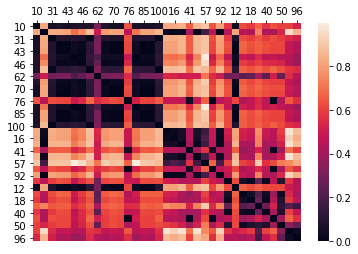

In [109]:
heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

ax.xaxis.set_ticks_position('top')

# save figure
plt.savefig('heatmap.png', dpi=1000)
plt.show()

# kmeans

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [47]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [48]:
clinski_harabaz_scores

[74.01023353002152,
 109.9987540852756,
 108.14240301881567,
 118.92248101783422,
 156.99232993642474,
 225.10092127595163,
 273.23179879873516,
 352.62020364193097]

In [49]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [50]:
labels_kmeans

array([0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1])

In [51]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [63]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [64]:
meanShift = MeanShift(bandwidth=1.3)
labels_mean = meanShift.fit_predict(dissimilarity)

In [65]:
labels_mean

array([1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0], dtype=int64)

In [66]:
data_ten_minutes['labels_meanshift'] = labels_mean

# DBSCAN

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
labels_dbscan = DBSCAN(eps = 0.36).fit_predict(dissimilarity)

In [69]:
labels_dbscan

array([-1,  0, -1,  1,  1, -1,  0,  0, -1,  0,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1, -1,  0, -1, -1, -1,  1,  1,  1, -1,  1,  1,  0,
       -1,  1,  1], dtype=int64)

In [70]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

# Gaussian 

In [71]:
from sklearn import mixture

In [72]:
labels_gaussian = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(dissimilarity).predict(dissimilarity)

In [73]:
labels_gaussian

array([2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1], dtype=int64)

In [74]:
data_ten_minutes['labels_gaussian'] = labels_gaussian

### 删除id 8 和34， 这两个id无原始label

In [75]:
labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
 # 删除id = 8 id = 34 因为没有这两个id的label
data_ten_minutes =  data_ten_minutes.drop(labels=2, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=12, axis=0)

data_ten_minutes['labels'] = labels
data_ten_minutes

Id      0           1           2           3           4           5  \
0     4  243.2  243.000000  243.700000  244.000000  244.300000  244.500000   
1     5  244.9  247.400000  247.900000  247.200000  247.200000  245.300000   
3    10  233.7  233.200000  231.400000  232.500000  233.800000  234.900000   
4    12  231.1  231.700000  229.600000  230.800000  232.200000  232.900000   
5    15  243.0  242.400000  243.000000  243.800000  244.100000  244.200000   
6    16  244.4  247.100000  247.700000  246.800000  246.800000  245.600000   
7    17  245.8  247.500000  247.700000  247.200000  247.300000  246.800000   
8    18  243.0  243.000000  243.100000  243.900000  244.100000  244.300000   
9    29  245.4  247.400000  247.700000  246.900000  247.100000  246.200000   
10   31  233.8  234.100000  232.200000  231.900000  234.800000  235.700000   
11   32  230.6  231.000000  230.600000  231.800000  233.300000  233.400000   
13   39  241.3  239.200000  241.000000  241.800000  242.200000  242.500000   
14   40  243.1  243.000000  243.200000  244.000000  244.300000  244.500000   
15   41  246.8  246.300000  246.700000  245.600000  244.200000  243.400000   
16   43  231.0  231.200000  229.800000  231.300000  232.500000  232.700000   
17   45  235.9  235.600000  235.000000  235.900000  236.700000  237.000000   
18   46  234.1  234.100000  233.500000  234.200000  234.400000  235.100000   
19   47  234.1  233.400000  231.000000  229.100000  234.700000  235.000000   
20   49  246.7  246.200000  246.500000  244.700000  242.700000  242.000000   
21   50  242.4  241.600000  242.200000  243.000000  243.500000  243.900000   
22   52  235.1  231.600000  232.100000  234.900000  235.600000  237.700000   
23   54  245.8  247.600000  247.700000  247.200000  247.300000  246.700000   
24   57  247.3  250.100000  249.900000  248.900000  248.800000  247.000000   
25   62  239.6  238.300000  238.600000  239.700000  241.100000  240.800000   
26   64  247.7  250.200000  250.111111  249.300000  249.100000  247.500000   
27   66  233.2  233.400000  232.700000  233.600000  234.600000  234.900000   
28   70  230.5  230.928571  228.555556  229.750000  231.285714  231.642857   
29   75  230.5  231.200000  229.700000  230.800000  232.200000  232.800000   
30   76  246.1  245.500000  246.300000  244.300000  241.400000  240.600000   
31   78  235.3  235.300000  234.700000  235.600000  236.400000  236.700000   
32   85  231.8  232.000000  230.600000  232.100000  233.300000  233.800000   
33   92  244.8  247.200000  247.700000  246.700000  247.000000  245.900000   
34   96  237.4  234.200000  235.800000  237.333333  237.800000  239.200000   
35   99  231.1  231.800000  230.600000  231.600000  233.000000  233.500000   
36  100  234.4  233.800000  232.100000  231.400000  235.000000  235.500000   

             6           7           8  ...    2581        2582        2583  \
0   242.400000  242.500000  241.700000  ...  246.10  244.900000  243.100000   
1   240.600000  241.900000  241.900000  ...  246.90  245.277778  242.722222   
3   234.500000  235.400000  235.400000  ...  242.40  242.600000  239.900000   
4   232.500000  233.100000  232.600000  ...  242.00  241.900000  239.300000   
5   241.900000  242.400000  241.700000  ...  246.10  245.100000  243.800000   
6   239.700000  241.222222  242.300000  ...  247.20  245.900000  243.300000   
7   242.200000  242.900000  243.400000  ...  246.40  245.800000  243.900000   
8   242.111111  242.300000  242.000000  ...  246.00  244.900000  243.222222   
9   241.300000  242.400000  242.700000  ...  247.00  245.700000  244.000000   
10  235.100000  235.400000  234.700000  ...  240.00  241.700000  239.200000   
11  233.000000  232.888889  232.700000  ...  242.45  241.833333  239.000000   
13  239.500000  240.800000  239.500000  ...  245.90  244.888889  243.944444   
14  242.100000  242.400000  242.000000  ...  246.00  245.200000  243.800000   
15  240.200000  242.600000  245.100000  ...  247.90  247.000000  245.000000   
16  232.400

# plot 原始图

In [81]:
import matplotlib.pyplot as plt

from collections import OrderedDict

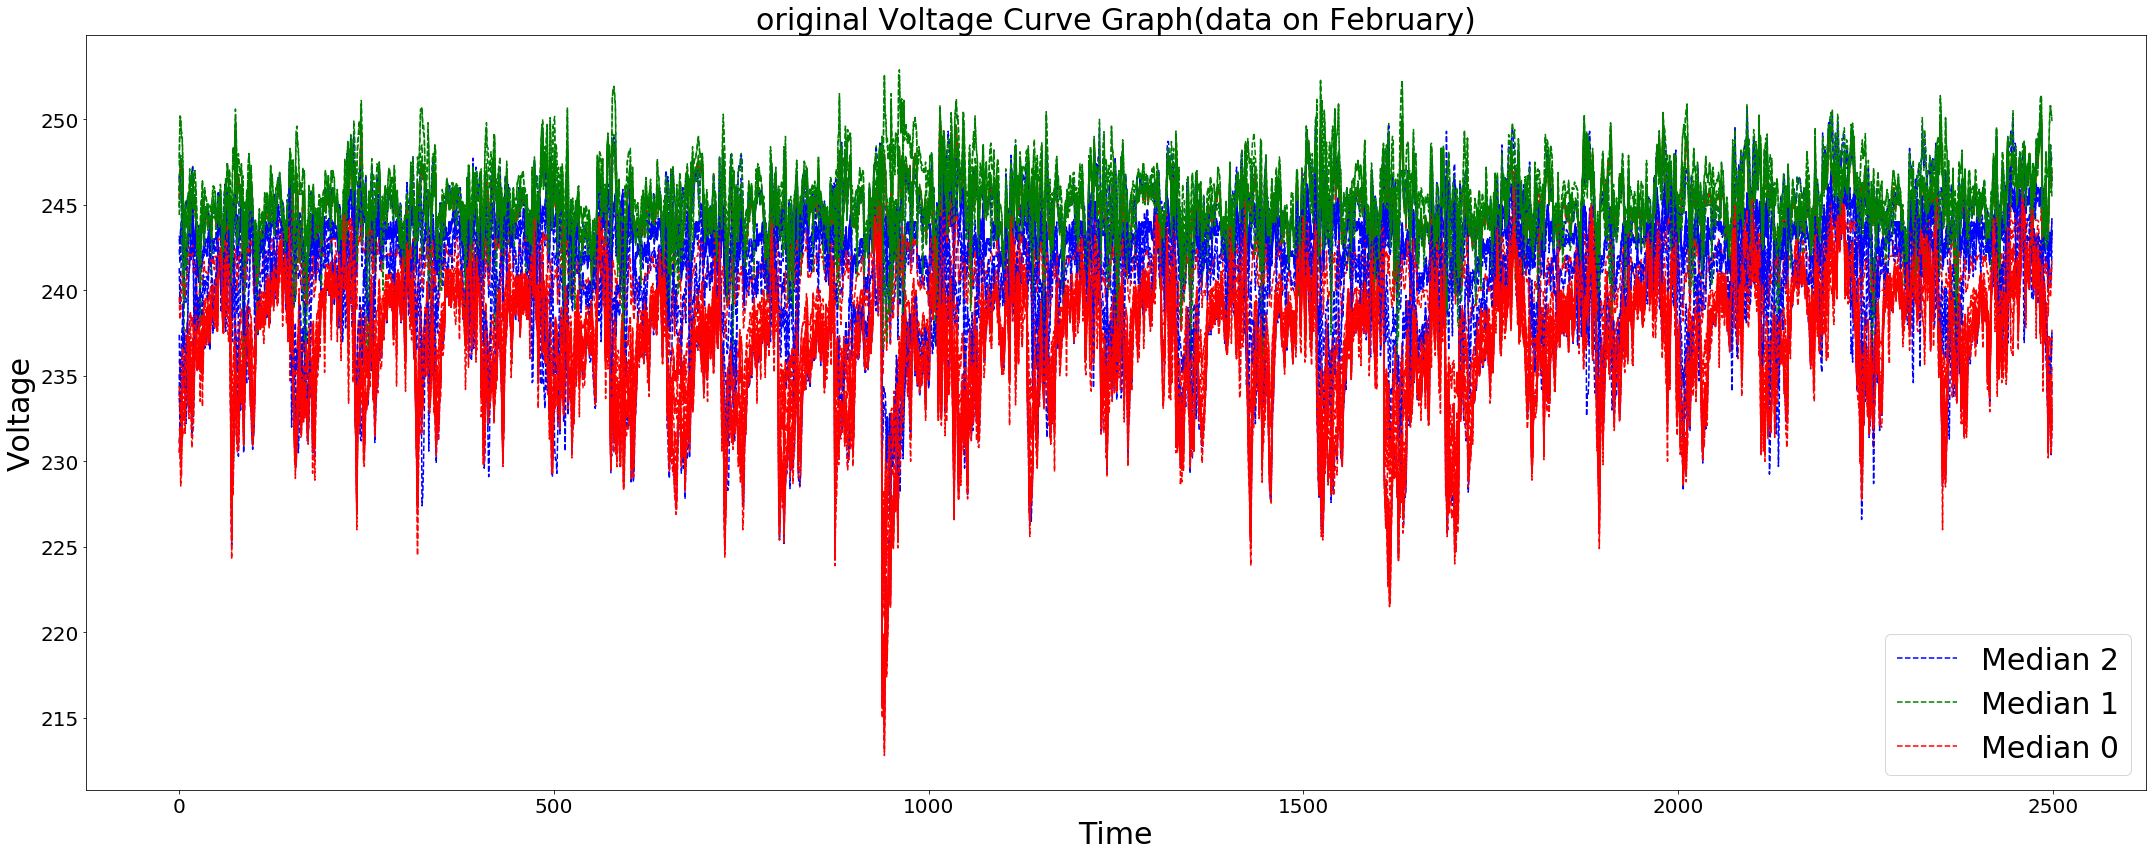

In [102]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], ls = '--',label = 'cluster '  + str(idx))
    
plt.legend(['Median 2', 'Median 1', 'Median 0'], loc = 'lower right',fontsize = 30)
plt.title('original Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot kmeans label

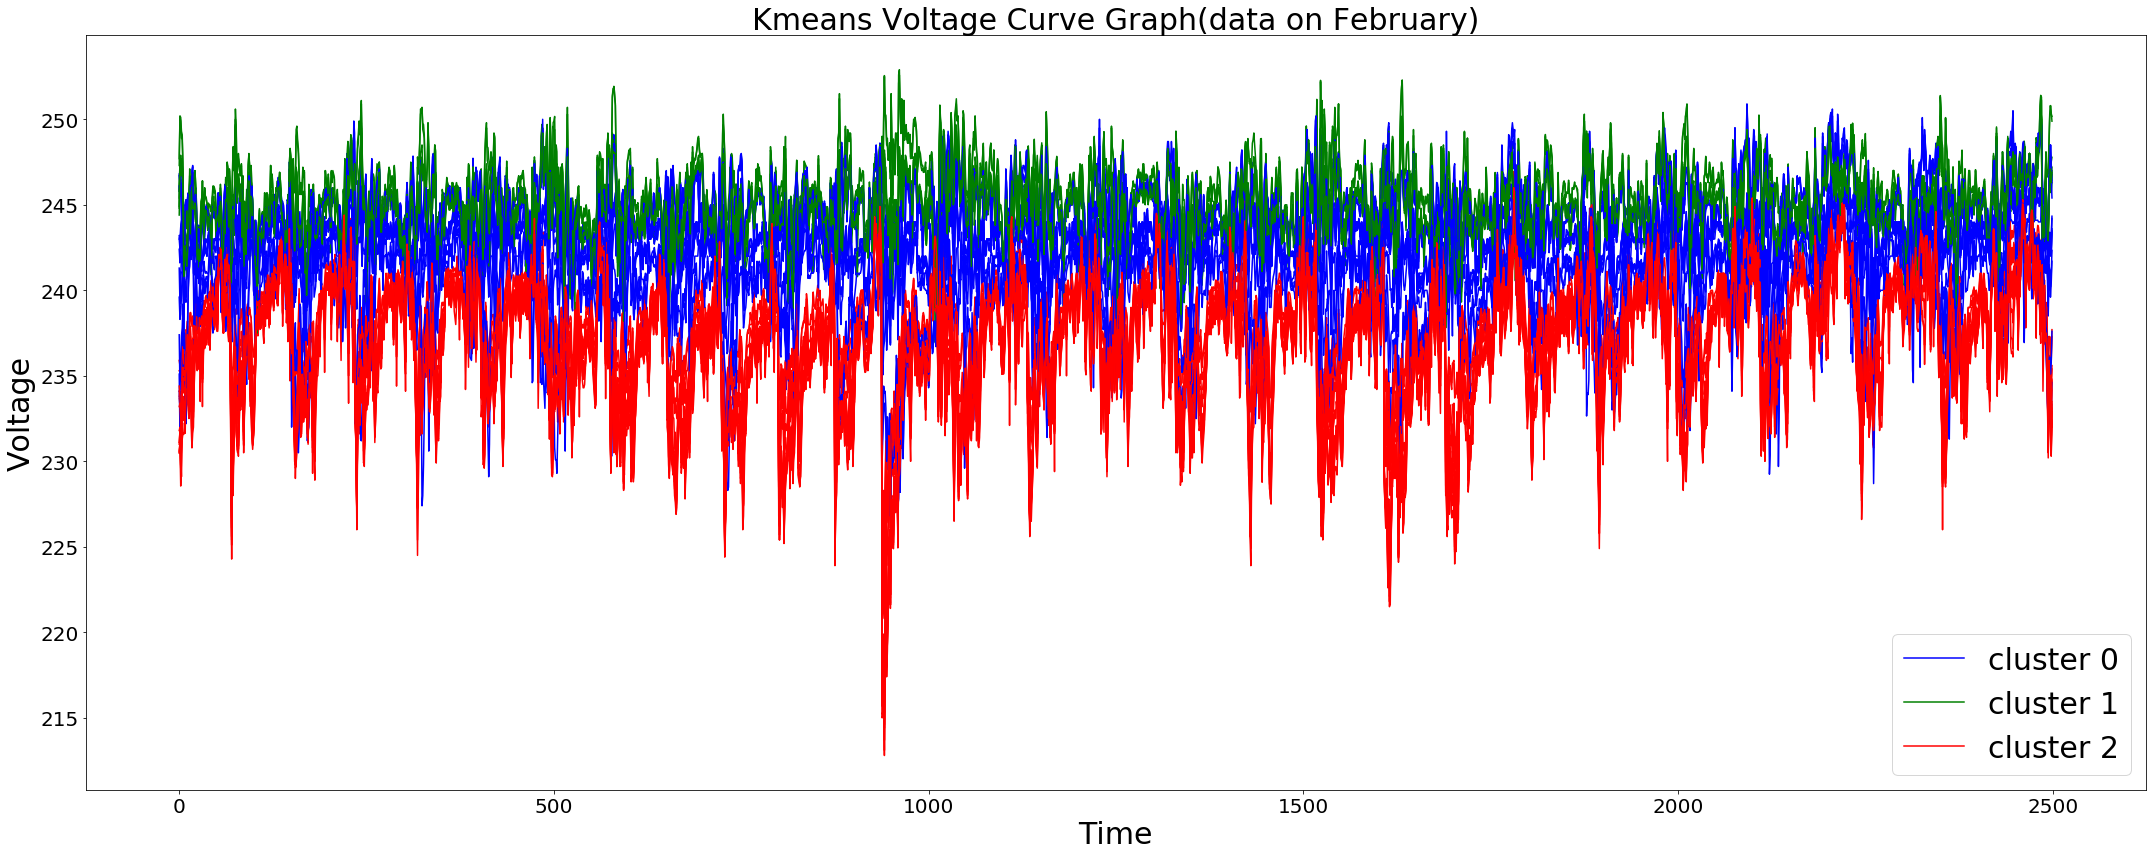

In [91]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['blue','red','green']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Kmeans Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot meanshift

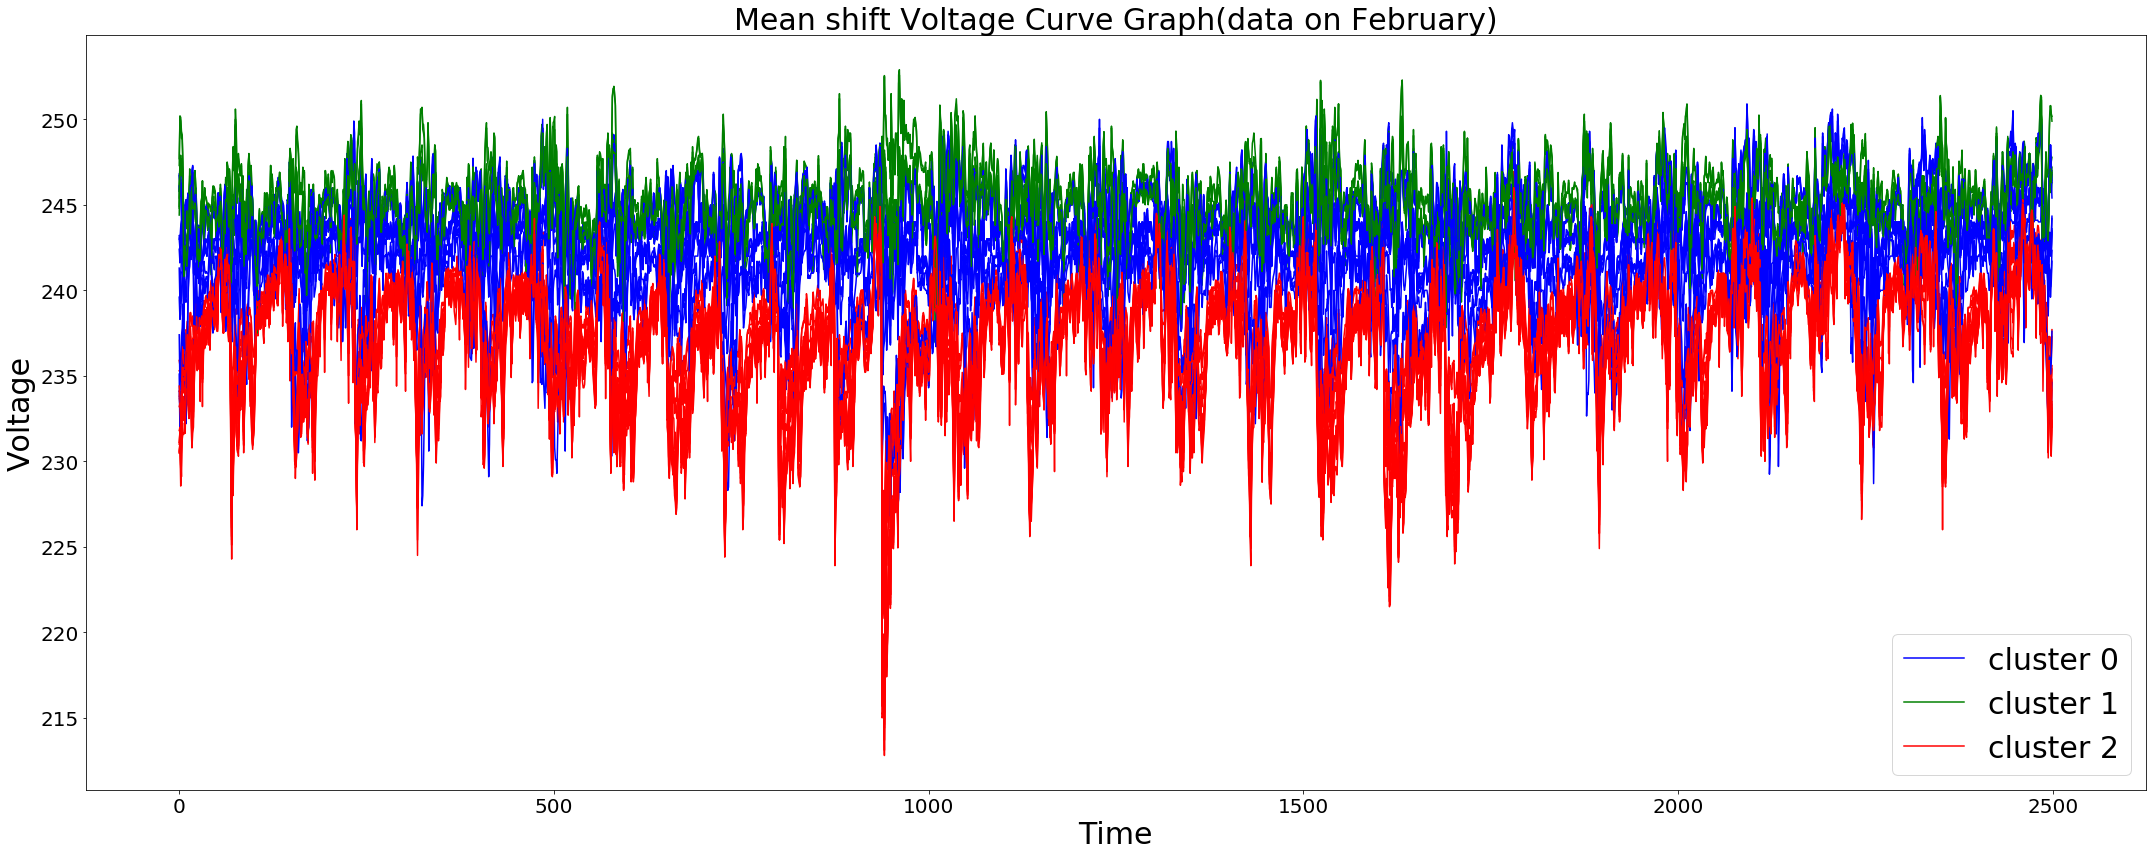

In [86]:
color_list = ['red','blue','green']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Mean shift Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot DBSCAN

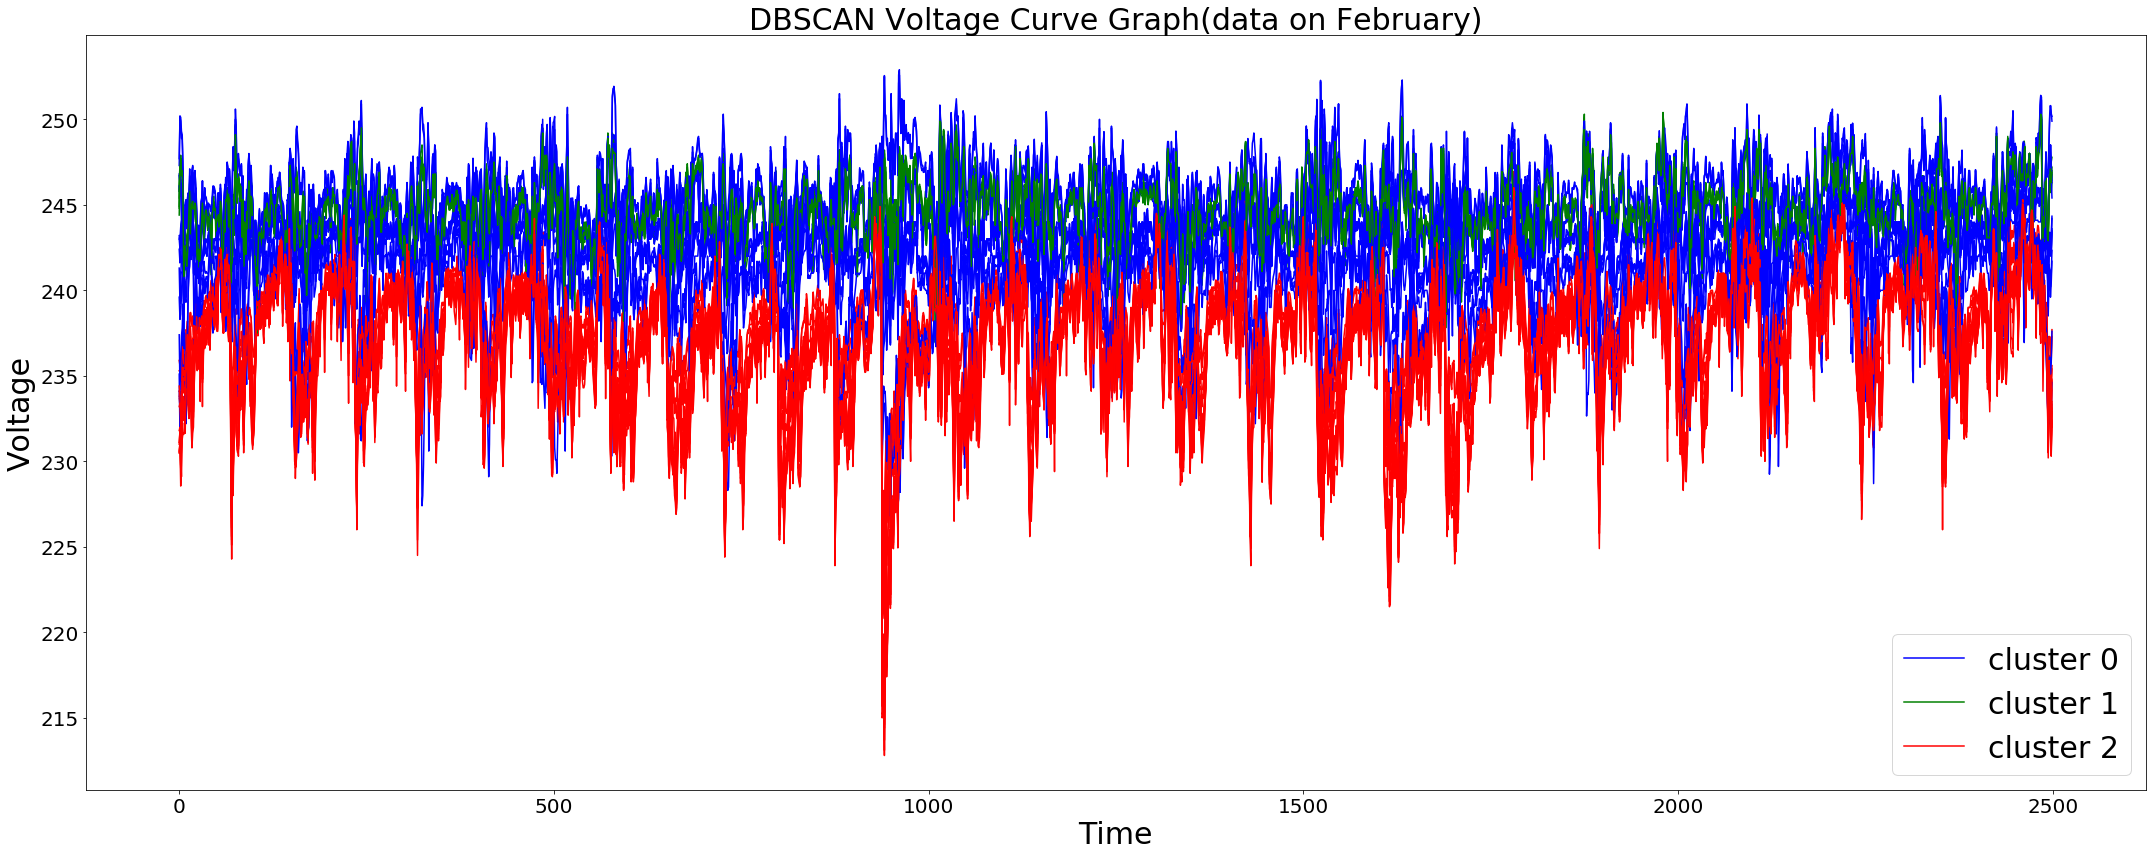

In [92]:
color_list = ['blue','green','red']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('DBSCAN Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()



# plot Guassian

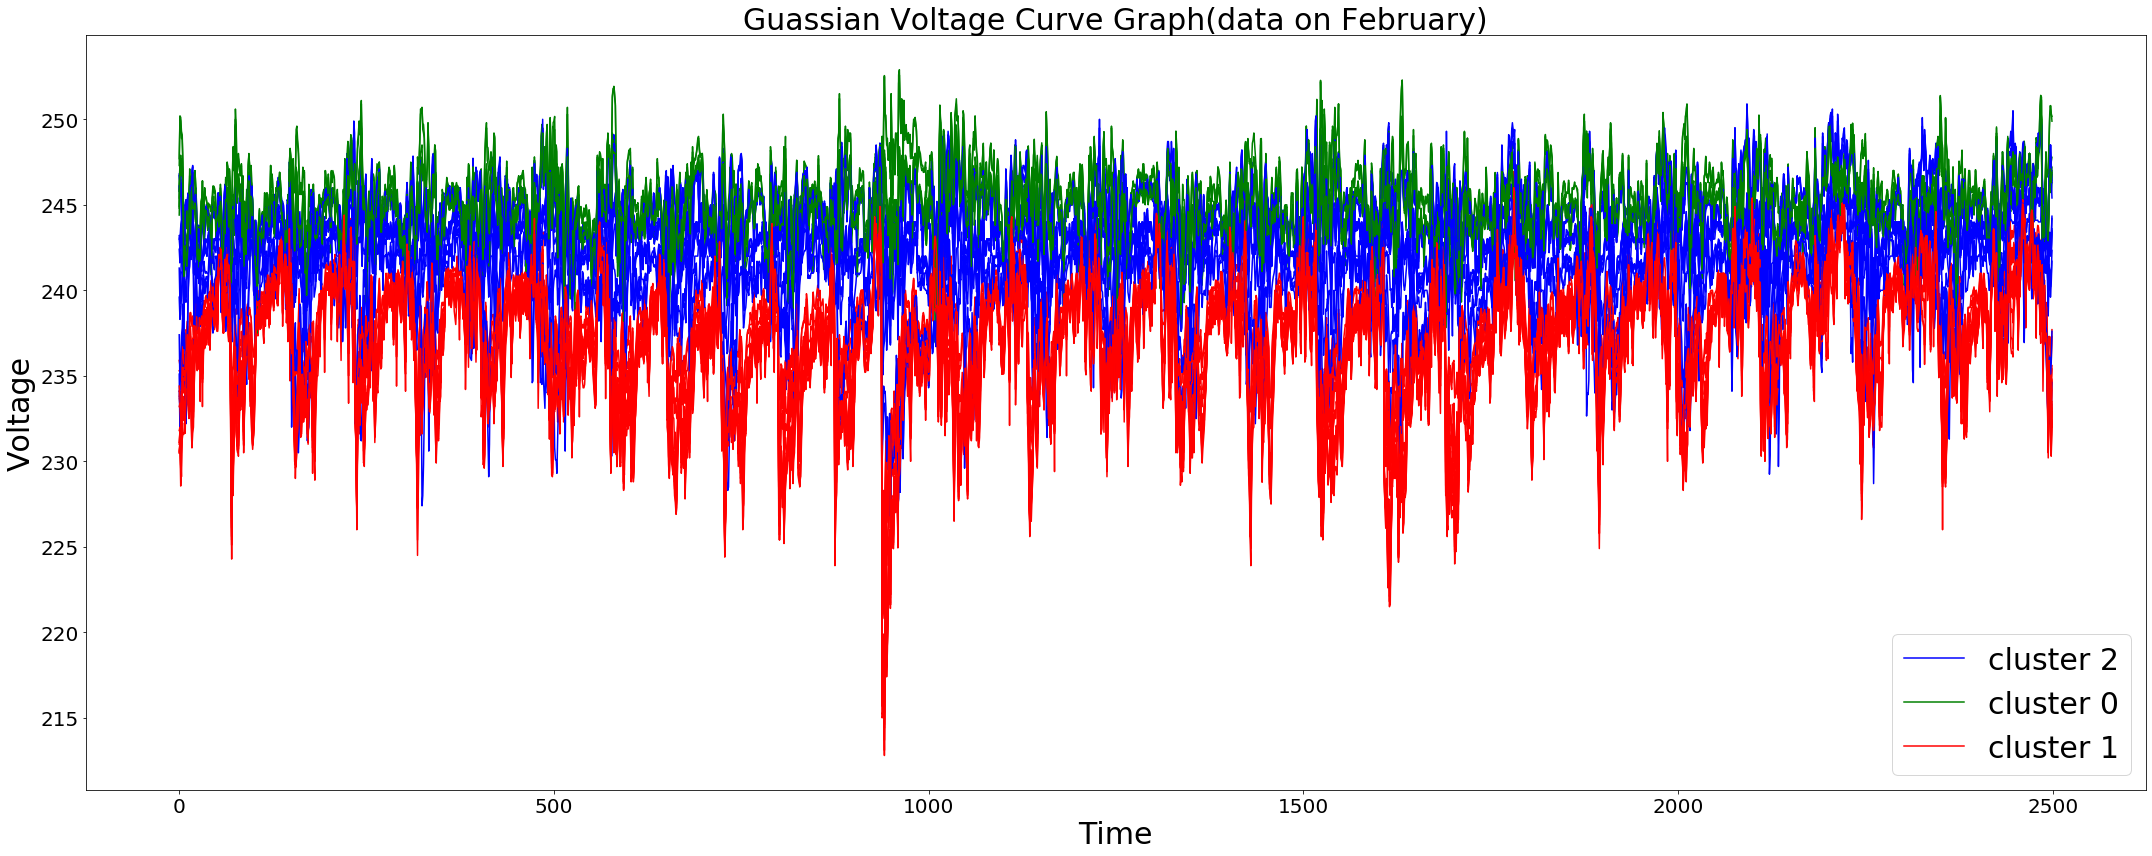

In [93]:
color_list = ['green','red','blue']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_gaussian'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('Guassian Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()


# Confusion Matrix Kmeans

In [90]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

array([[ 1, 14,  1],
       [ 2,  0,  7],
       [ 9,  1,  0]], dtype=int64)

In [263]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          14  1  1
1           0  9  0
2           1  1  8

# Confusion Matrix Mean Shift

In [265]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          14  1  1
1           0  2  7
2           1  9  0

# Confusion Matrix DBSCAN

In [266]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted  0  1  2
Actual            
0          7  1  8
1          4  5  0
2          9  0  1

# Confusion Matrix Gaussian

In [267]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_gaussian'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          15  0  1
1           0  0  9
2           1  8  1

# Gaussian Heatmap

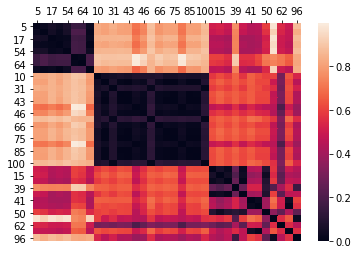

In [99]:
heatmap_kmeans = list(labels_gaussian) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

# print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]
heatmap_corr = heatmap_ten.corr()

heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)
    
ax.xaxis.set_ticks_position('top')
    

# save figure
plt.savefig('heatmap_guassian.png', dpi=1000)
plt.show()

# Kmeans Heatmap

In [95]:
heatmap_kmeans = list(labels_kmeans) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

{4: 0, 5: 2, 10: 1, 12: 1, 15: 0, 16: 2, 17: 2, 18: 0, 29: 2, 31: 1, 32: 1, 39: 0, 40: 0, 41: 0, 43: 1, 45: 1, 46: 1, 47: 1, 49: 0, 50: 0, 52: 0, 54: 2, 57: 2, 62: 0, 64: 2, 66: 1, 70: 1, 75: 1, 76: 0, 78: 1, 85: 1, 92: 2, 96: 0, 99: 1, 100: 1}


In [96]:
heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]

In [97]:
heatmap_corr = heatmap_ten.corr()

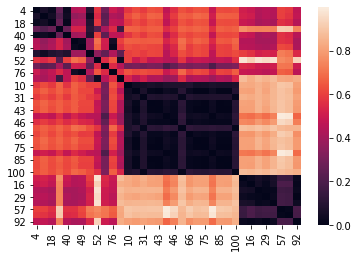

In [98]:
heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('heatmap_kmeans.png', dpi=100)
plt.show()

# Mean Shift

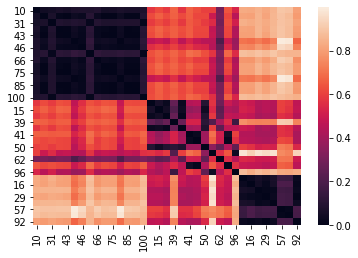

In [114]:
heatmap_kmeans = list(labels_mean) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

# print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]
heatmap_corr = heatmap_ten.corr()

heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('heatmap_meanshift.png', dpi=100)
plt.show()